# A2 - Descriptive statistics
Probability and Statistics<br>
[Helsinki Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## Setup

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The following dataset contains heart disease related data. The variables are:
- age - patient's age (years)
- sex - patient's sex (1 = Male, 0 = Female)
- rest_blood_pressure - systolic blood pressure at rest (mmHg)
- serum_cholesterol - cholesterol level in blood serum (mg/dl)
- max_heart_rate - maximum heart rate at exerices (bpm = beat per minute)
- exercise_angina - chest pain (angina) at exerices (1 = Yes, 0 = No)
- heart_disease - classification of heart disease (0 = healthy, 1,2,3,4 = Heart disease)

More information about the dataset can be read here: [Heart disease dataset](https://archive.ics.uci.edu/dataset/45/heart+disease).

In [2]:
# Read the example data
file = "a2_data.csv"
data = pd.read_csv(file)
data.describe()

,age,sex,resting_blood_pressure,serum_cholesterol,max_heart_rate,exercise_angina,heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,131.689769,246.693069,149.607261,0.326733,0.937294
std,9.038662,0.467299,17.599748,51.776918,22.875003,0.469794,1.228536
min,29.000000,0.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,241.000000,153.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,166.000000,1.000000,2.000000
max,77.000000,1.000000,200.000000,564.000000,202.000000,1.000000,4.000000


## Problem 1

By coding and interpreting the results find the answers to the following questions. Give the answers with two decimal accuracy.

a) How many patients were in this dataset?<br>
b) What was the average and the standard deviation of age?<br>
c) How many men and women were there?<br>
d) What was the range of the maximum heart rate?<br>
e) What where the minimum and maximum of the serum cholesterol values?

In [3]:
# c
sex = data['sex'] # male = 1, female = 0
male = (sex == 1).sum()
print(f"Male: {male}")
female = (sex == 0).sum()
print(f"Female: {female}")
print(f"Female using sex.count() - male: {sex.count() - male}\n")

# d
max_heart_rate = data['max_heart_rate']
min_mhr = max_heart_rate.min()
max_mhr = max_heart_rate.max()
print(f"Max - min: {max_mhr - min_mhr}")
# or
ptp_method = np.ptp(max_heart_rate)
print(f"Range with ptp method: {ptp_method}\n")

# e
serum_cholesterol = data['serum_cholesterol']
print(f"Min of serum cholesterol: {serum_cholesterol.min()}")
print(f"Max of serum cholesterol: {serum_cholesterol.max()}")

Male: 206
Female: 97
Female using sex.count() - male: 97

Max - min: 131.0
Range with ptp method: 131.0

Min of serum cholesterol: 126.0
Max of serum cholesterol: 564.0


**Your answers**: <br>
a, 303 <br>
b, 9.04 <br>
c, male = 206, women = 97 <br>
d, 131.00 <br>
e, min: 126.0, max: 564.0 <br>

## Problem 2

Draw a histogram, boxplot and violinplot of the resting blood pressure values. Use the following array for the bins settings in the histogram `np.arange(80, 220, 10)`. Decorate the graphs, e.g. add labels, title, grid lines, etc.

Based on the graphs only (e.g. do not calculate anything!) estimate the statistics for the resting blood pressure values.

a) What was the median? <br>
b) What where the minimum and maximum? <br>
c) What was the interquartile range? <br>
d) What was the mode of the categories used in the histogram? <br>
e) Lastly, discuss how easy or difficult it was to estimate these statistics based on the graphics only. <br>

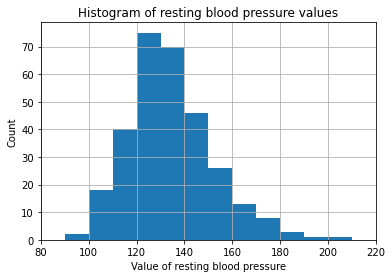

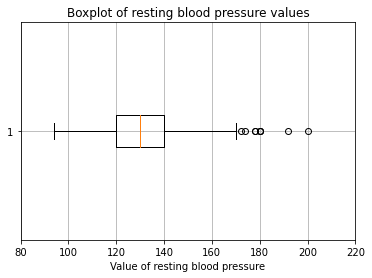

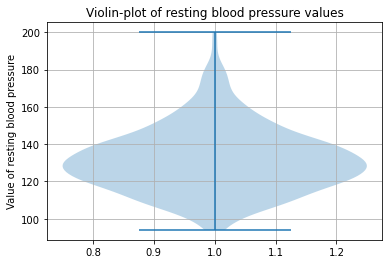

In [4]:
resting_blood_pressure = data['resting_blood_pressure']

resting_blood_pressure.hist(bins = np.arange(80, 220, 10))
plt.xlabel('Value of resting blood pressure')
plt.ylabel('Count')
plt.xlim(80, 220)
plt.title('Histogram of resting blood pressure values')
plt.show()

plt.boxplot(resting_blood_pressure.to_frame(),vert = False)
plt.title('Boxplot of resting blood pressure values')
plt.ylabel('')
plt.xlabel('Value of resting blood pressure')
plt.xlim(80, 220)
plt.grid()
plt.show()

plt.violinplot(resting_blood_pressure)
plt.title('Violin-plot of resting blood pressure values')
plt.ylabel('Value of resting blood pressure')
plt.grid()
plt.show()

a) 130 <br>
b) Min: 90, max: 213 <br>
c) |-20| = 120 - 140 <br>
d) 120 <br>
e) All values were easy to read. In terms of min and max value, it is easy to define the estimation, but not the precise value in case. <br>

## Problem 3
Compare the *serum cholesterol* to the *resting blood pressure*.

By coding:
- Create a scatter-plot where *resting blood pressure* is in the x-axis and *serum cholesterol* in y-axis.
- Count what proportion of the data have *serum cholesterol* higher than 350 mg/ml.
- Count what proportion of the data have *resting blood pressure* higher than 190 mmHg.

Explain:
- By studying the graph and calculations evaluate if there are any outliers. Explain in your own words which values could be the outliers and why.

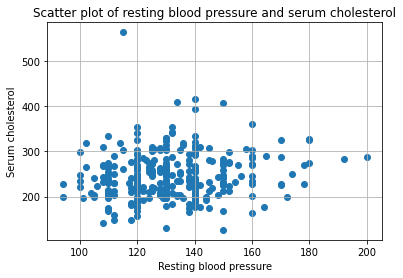


Proportion of serum cholesterol higher than 350 mg/ml: 2.64% or 0.03

Proportion of resting blood pressure higher than 190 mmHg: 0.66% or 0.01


In [5]:
serum_cholesterol = data['serum_cholesterol']

plt.scatter(resting_blood_pressure, serum_cholesterol)
plt.xlabel('Resting blood pressure')
plt.ylabel('Serum cholesterol')
plt.title('Scatter plot of resting blood pressure and serum cholesterol')

plt.grid()
plt.show()

# serum cholesterol > 350 mg/ml
sc_350 = (serum_cholesterol > 350).sum()
sc_350_proportion = sc_350 / serum_cholesterol.count() * 100
print(f"\nProportion of serum cholesterol higher than 350 mg/ml: {sc_350_proportion:.2f}% or {(sc_350_proportion/100):.2f}\n")

# resting blood pressure > 190 mmHG
rbp_190 = (resting_blood_pressure > 190).sum()
rbp_190_proportion = rbp_190 / resting_blood_pressure.count() * 100
print(f"Proportion of resting blood pressure higher than 190 mmHg: {rbp_190_proportion:.2f}% or {(rbp_190_proportion/100):.2f}")

**Your answer**: <br>
<br>
Outliers: (115,560) (192, 282) (200, 288) <br>
Why? Because they are out of the group. 


